In [101]:
import keras
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.callbacks import TensorBoard
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.regularizers import l2, activity_l2
from keras.constraints import maxnorm
import tensorflow as tf
import numpy as np
import matplotlib as plt
import math
np.random.seed(1)

In [16]:
#Creating functions for importing features and labels
def readFeaturesCSV(filename,usecols=range(1,785)):
    """Imports features from CSV file and standardizes the features"""
    features=np.genfromtxt(filename,delimiter=',',skip_header=1,usecols=usecols,dtype=np.float32)
    features=np.divide(features,255.0)
    return features

def readLabelsCSV(filename,usecols=0):
    """Imports labels from CSV file"""
    labels=np.genfromtxt(filename,delimiter=',',skip_header=1,usecols=usecols,dtype=np.int)
    labelsVector=np.zeros([len(labels),10])
    labelsVector[range(len(labelsVector)),labels]=1
    return labelsVector

In [17]:
def trainSplit(features,labels,splitRatio):
    """Splits into training and validation set"""
    trainIndices=np.random.randint(low=0,high=len(features)-1,size=int(math.floor(len(features)*splitRatio)))
    trainFeatures=features[trainIndices]
    trainLabels=labels[trainIndices]
    valFeatures=np.delete(features,trainIndices,0)
    valLabels=np.delete(labels,trainIndices,0)
    return (trainFeatures,trainLabels,valFeatures,valLabels)

In [18]:
#Importing training data
features=readFeaturesCSV('./Raw Data/train.csv')
labels=readLabelsCSV('./Raw Data/train.csv')

In [60]:
#Splitting into training and validation set
trainFeatures,trainLabels,valFeatures,valLabels=trainSplit(features,labels,splitRatio=1.0)

In [103]:
#Create model - (Convolution layers x2 --> Max Pooling layer) x2 --> Fully connected layer --> Dropout layer --> Readout layer
model=Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',activation='relu',input_shape=(28, 28,1)))
model.add(Convolution2D(32, 3, 3, border_mode='same',activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Convolution2D(64, 3, 3, border_mode='same',activation='relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same',activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(1024,init='normal',activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,init='normal',activation='softmax'))

In [104]:
#Compile model
adam=Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
tensor_log=TensorBoard(log_dir='./TensorLogs', histogram_freq=0, write_graph=True, write_images=False)

#Train the model
train2D=trainFeatures.reshape((len(trainFeatures),28,28,1))
model.fit(train2D,trainLabels,batch_size=50,nb_epoch=25,validation_split=0.15,callbacks=[tensor_log])

Train on 35700 samples, validate on 6300 samples
Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/25
35700/35700 [==============================] - 414s - loss: 0.3701 - acc: 0.8871 - val_loss: 0.0988 - val_acc: 0.9716
Epoch 2/25
35700/35700 [==============================] - 394s - loss: 0.0865 - acc: 0.9736 - val_loss: 0.0646 - val_acc: 0.9814
Epoch 3/25
35700/35700 [==============================] - 400s - loss: 0.0543 - acc: 0.9827 - val_loss: 0.0449 - val_acc: 0.9876
Epoch 4/25
35700/35700 [==============================] - 396s - loss: 0.0376 - acc: 0.9882 - val_loss: 0.0410 - val_acc: 0.9883
Epoch 5/25
35700/35700 [==============================] - 403s - loss: 0.0288 - acc: 0.9909 - val_loss: 0.0362 - val_acc: 0.9887
Epoch 6/25
35700/35700 [==============================] - 402s - loss: 0.0220 - acc: 0.9930 - val_loss: 0.0303 - val_acc: 0.9913
Epoch 7/25
35700/35700 [==============================] - 391s - loss: 0.0174 - acc: 0.9943 - val_loss: 0.0255 

In [105]:
#Importing test data
testFeatures=readFeaturesCSV('./Raw Data/test.csv',usecols=range(0,784))

In [106]:
#Predicting
test2D=testFeatures.reshape((len(testFeatures),28,28,1))
predictions=model.predict_classes(test2D)

28000/28000 [==============================] - 93s    


In [107]:
predictions_prob=model.predict(test2D)

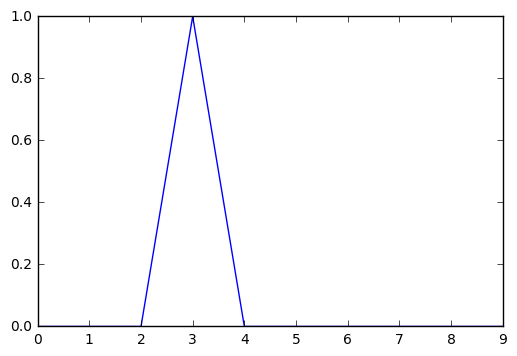

In [109]:
import matplotlib.pyplot as pyplot
%matplotlib inline
pyplot.plot(predictions_prob[4,:])

In [110]:
#Exporting
np.savetxt('Output/Keras_CCpCCpFcD_25.csv',predictions,delimiter=',')